In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'movielens-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F576343%2F1043453%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240205%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240205T211409Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7c7f99913167e5eba574e9dbdab595a8cea1ab6aeef4e8e6f5943c1665b6f83720c4883103fd02f67c5cc40d34e95a25b198286d0db145586c7dafe7d7ede2ba299d0dafba24a7a755530c6da16e49c78fd93dcc9af774ed5d603962a70e83bd3f28bedb2199e6d9d05f92eb858f0cf9b3f7cd9089007025ab2a498bd29b9b4c4518a0bf637679f67bc55c9a12311d82146f04367e91db7de3f35e24ccdc901ec0dcfb305041eb3f6d3ecf661e3b0810777dc1d12bac6c2be7983115bc7a430613a9cd6feb90ce170218edb4a406c6a084856ffd1450636c1d69a88f5a2e6ff4a6beea4767deaf0439d0c050d46b4e598fd2cb7a5f12ed6dfcebffa07d81044f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 896112 bytes downloaded
Downloaded and uncompressed: movielens-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-dataset/movies.csv
/kaggle/input/movielens-dataset/ratings.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movie_ratings = pd.read_csv('/kaggle/input/movielens-dataset/ratings.csv')

In [5]:
movie_ratings.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
105337     668   144976     2.5  1448656898
105338     668   148626     4.5  1451148148

[105339 rows x 4 columns]>

In [6]:
movie_ratings.isnull


<bound method DataFrame.isnull of         userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
105337     668   144976     2.5  1448656898
105338     668   148626     4.5  1451148148

[105339 rows x 4 columns]>

In [7]:
movie_ratings.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
movie_ratings.isnull().values.any()


False

In [9]:
movie_ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


from matplotlib import pyplot as plt
_df_0['userId'].plot(kind='hist', bins=20, title='userId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='userId', y='movieId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='movieId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['userId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('userId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['movieId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('movieId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['userId'].plot(kind='line', figsize=(8, 4), title='userId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='userId', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='movieId', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='timestamp', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: >

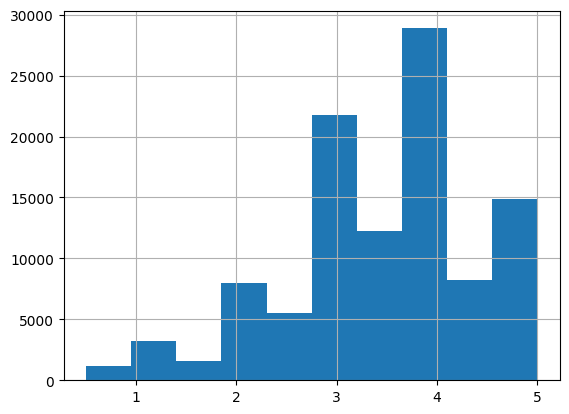

In [10]:
movie_ratings['rating'].hist()

In [11]:
movie_ratings['rating'].max()


5.0

In [12]:
movie_ratings['rating'].min()

0.5

In [13]:
# find top 5 rated moves movies and bottom 5 rated movies with their names

import pandas as pd
# Get the names of all movies
movie_names = pd.read_csv('/kaggle/input/movielens-dataset/movies.csv')['title']

# Find the top 5 rated movies
top_5_rated_movies = movie_ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(5)
top_5_rated_movies_with_names = pd.DataFrame(top_5_rated_movies).merge(movie_names, left_on='movieId', right_index=True)

# Find the bottom 5 rated movies
bottom_5_rated_movies = movie_ratings.groupby('movieId')['rating'].mean().sort_values().head(5)
bottom_5_rated_movies_with_names = pd.DataFrame(bottom_5_rated_movies).merge(movie_names, left_on='movieId', right_index=True)

# Print the results
print("Top 5 rated movies:")
print(top_5_rated_movies_with_names)

print("\nBottom 5 rated movies:")
print(bottom_5_rated_movies_with_names)


Top 5 rated movies:
       userId  movieId  rating   timestamp
40246     277      293     5.0  1445249846
27139     195     2502     5.0  1250241365
61486     432     2716     5.0   957672709
12221     107     3360     5.0   958159797
84627     575     7566     5.0  1084378291

Bottom 5 rated movies:
       userId  movieId  rating   timestamp
32220     224    79139     0.5  1428133298
6151       62     4480     0.5  1267427535
58620     413    95441     0.5  1357295294
6154       62     4565     0.5  1267426018
6155       62     4571     0.5  1267427283


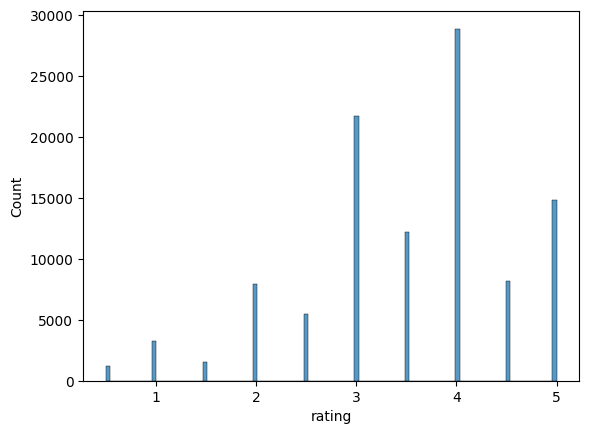

In [22]:
#  Calculate and visualize the distribution of movie ratings.

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of movie ratings
sns.histplot(movie_ratings['rating'])

# Show the plot
plt.show()


In [25]:


# Get the top 5 rated movies
top_5_rated_movies = movie_ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(5)
top_5_rated_movies_with_names = pd.DataFrame(top_5_rated_movies).merge(movie_names, left_on='movieId', right_index=True)

# Get the bottom 5 rated movies
bottom_5_rated_movies = movie_ratings.groupby('movieId')['rating'].mean().sort_values().head(5)
bottom_5_rated_movies_with_names = pd.DataFrame(bottom_5_rated_movies).merge(movie_names, left_on='movieId', right_index=True)

# Print the results
print("Top 5 rated movies:")
print(top_5_rated_movies_with_names)

print("\nBottom 5 rated movies:")
print(bottom_5_rated_movies_with_names)


Top 5 rated movies:
         rating                                title
movieId                                             
465         5.0             Romeo Is Bleeding (1993)
1757        5.0              Mr. & Mrs. Smith (1941)
5003        5.0           Intolerable Cruelty (2003)
5007        5.0  Texas Chainsaw Massacre, The (2003)

Bottom 5 rated movies:
         rating                   title
movieId                                
2461        0.5    Irma la Douce (1963)
8119        0.5  Drag Me to Hell (2009)


Top 5 highest rated genres:
genres
Comedy|Crime|Drama|Fantasy                        5.0
Action|Adventure|Comedy|Crime|Romance|Thriller    5.0
Crime|Mystery|War                                 5.0
Animation|Fantasy|Sci-Fi|Thriller                 5.0
Action|Comedy|Drama|Romance                       5.0
Name: rating, dtype: float64

Bottom 5 lowest rated genres:
genres
Comedy|Documentary|Romance                 0.5
Adventure|Drama|Romance|Sci-Fi|Thriller    0.5
Children|Comedy|Drama|Musical|Romance      0.5
Children|Comedy|Drama|Musical              0.5
Children|Comedy|Crime                      0.5
Name: rating, dtype: float64


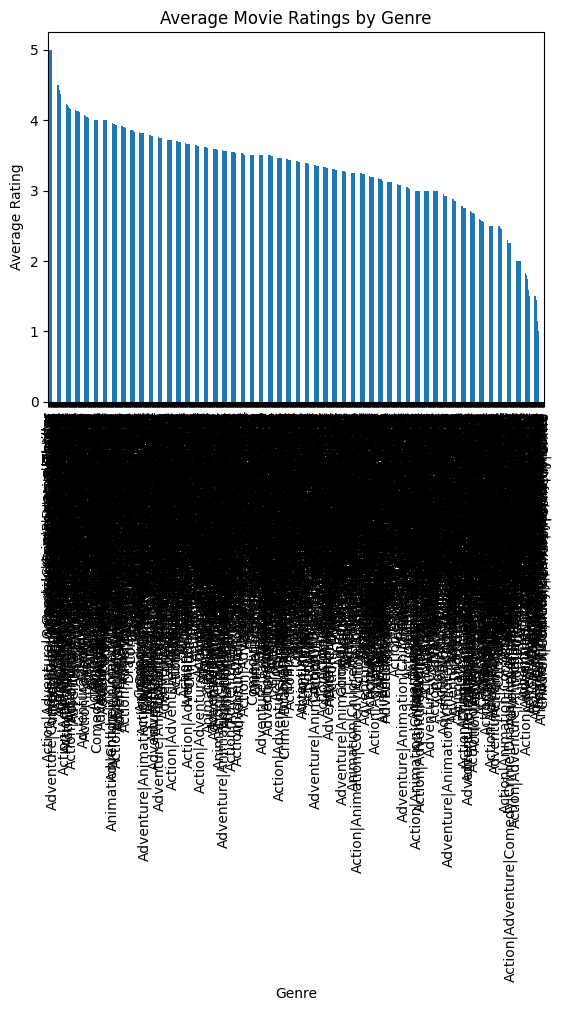

In [27]:
#  Explore the relationship between movie genres and ratings.

import pandas as pd
import matplotlib.pyplot as plt
# Extract the genres for each movie
movie_genres = pd.read_csv('/kaggle/input/movielens-dataset/movies.csv')[['movieId', 'genres']]

# Merge the movie ratings and genres dataframes
movie_ratings_with_genres = movie_ratings.merge(movie_genres, on='movieId')

# Group the data by genre and calculate the average rating for each genre
average_ratings_by_genre = movie_ratings_with_genres.groupby('genres')['rating'].mean()

# Sort the average ratings in descending order
average_ratings_by_genre = average_ratings_by_genre.sort_values(ascending=False)

# Print the top 5 highest rated genres
print("Top 5 highest rated genres:")
print(average_ratings_by_genre.head(5))

# Print the bottom 5 lowest rated genres
print("\nBottom 5 lowest rated genres:")
print(average_ratings_by_genre.tail(5))

# Create a bar chart of the average ratings by genre
average_ratings_by_genre.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Genre")
plt.xticks(rotation=90)
plt.show()
